Connection to google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the data set CSV file

In [4]:
import pandas as pd

base_path = "/content/drive/My Drive/AgriYield_Project/"

fao = pd.read_csv(base_path + "FAOSTAT_data_en_11-24-2025.csv")
crop_rec = pd.read_csv(base_path + "Crop_recommendation.csv")
weather = pd.read_csv(base_path + "WeatherEvents_Jan2016-Dec2022.csv")

Printing FAOSTAT datase

In [5]:
print(fao.head())

  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element Item Code (CPC)  \
0          5312  Area harvested           01654   
1          5412           Yield           01654   
2          5510      Production           01654   
3          5312  Area harvested           01654   
4          5412           Yield           01654   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  Anise, badian, coriande

Printing crop recomendation dataset

In [6]:
print(crop_rec.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


Printing weather dataset

In [7]:
print(weather.head())

  EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

       City    County State  ZipCode  
0  Saguache  Saguache    CO  81149.0  
1  Saguache  Saguache    CO  81149.0  
2  Saguache

**Inspect** **each** **dataset**

In [8]:
print(fao.shape)
print(fao.columns)
fao.head()

print(crop_rec.shape)
print(crop_rec.columns)
crop_rec.head()

print(weather.shape)
print(weather.columns)
weather.head()


(6321, 15)
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')
(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
(8627181, 14)
Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode'],
      dtype='object')


,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


Clean and filter FAO dataset

In [9]:
fao = fao[fao["Element"].isin(["Yield", "Area harvested", "Production"])]


In [10]:
fao_pivot = fao.pivot_table(
    index=["Area", "Item", "Year"],
    columns="Element",
    values="Value"
).reset_index()


Prepare the Crop Recommendation dataset

In [11]:
crop_rec.rename(columns={
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium',
    'temperature': 'Temperature',
    'humidity': 'Humidity'
}, inplace=True)


Clean and aggregate Weather dataset

Extract date + year:

In [12]:
weather['StartTime(UTC)'] = pd.to_datetime(weather['StartTime(UTC)'])
weather['Date'] = weather['StartTime(UTC)'].dt.date
weather['Year'] = weather['StartTime(UTC)'].dt.year



Aggregate weather per year:

In [13]:
weather_yearly = weather.groupby('Year').size().reset_index(name='Weather_Event_Count')


Merge Datasets Together

Merge FAO + Weather (by year)

In [14]:
merged = fao_pivot.merge(weather_yearly, on="Year", how="left")


Merge with Soil/Environment data

We merge based on crop name:

In [15]:
final_df = merged.merge(
    crop_rec,
    left_on="Item",
    right_on="label",
    how="left"
)


Handle Missing Values

In [16]:
final_df.fillna(final_df.mean(numeric_only=True), inplace=True)


Split into Features & Target

In [17]:
X = final_df.drop(columns=["Yield"])
y = final_df["Yield"]


In [26]:
final_df.rename(columns={'rainfall': 'Rainfall'}, inplace=True)


EDA on merged data

Basic Info About the Merged Dataset

In [18]:
# Basic structure
final_df.info()

# Summary statistics
final_df.describe()

# Check for missing values
final_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 2322 non-null   object 
 1   Item                 2322 non-null   object 
 2   Year                 2322 non-null   int64  
 3   Area harvested       2322 non-null   float64
 4   Production           2322 non-null   float64
 5   Yield                2322 non-null   float64
 6   Weather_Event_Count  2322 non-null   float64
 7   Nitrogen             0 non-null      float64
 8   Phosphorus           0 non-null      float64
 9   Potassium            0 non-null      float64
 10  Temperature          0 non-null      float64
 11  Humidity             0 non-null      float64
 12  ph                   0 non-null      float64
 13  rainfall             0 non-null      float64
 14  label                0 non-null      object 
dtypes: float64(11), int64(1), object(3)
me

,0
Area,0
Item,0
Year,0
Area harvested,0
Production,0
Yield,0
Weather_Event_Count,0
Nitrogen,2322
Phosphorus,2322
Potassium,2322


Correlation Matrix

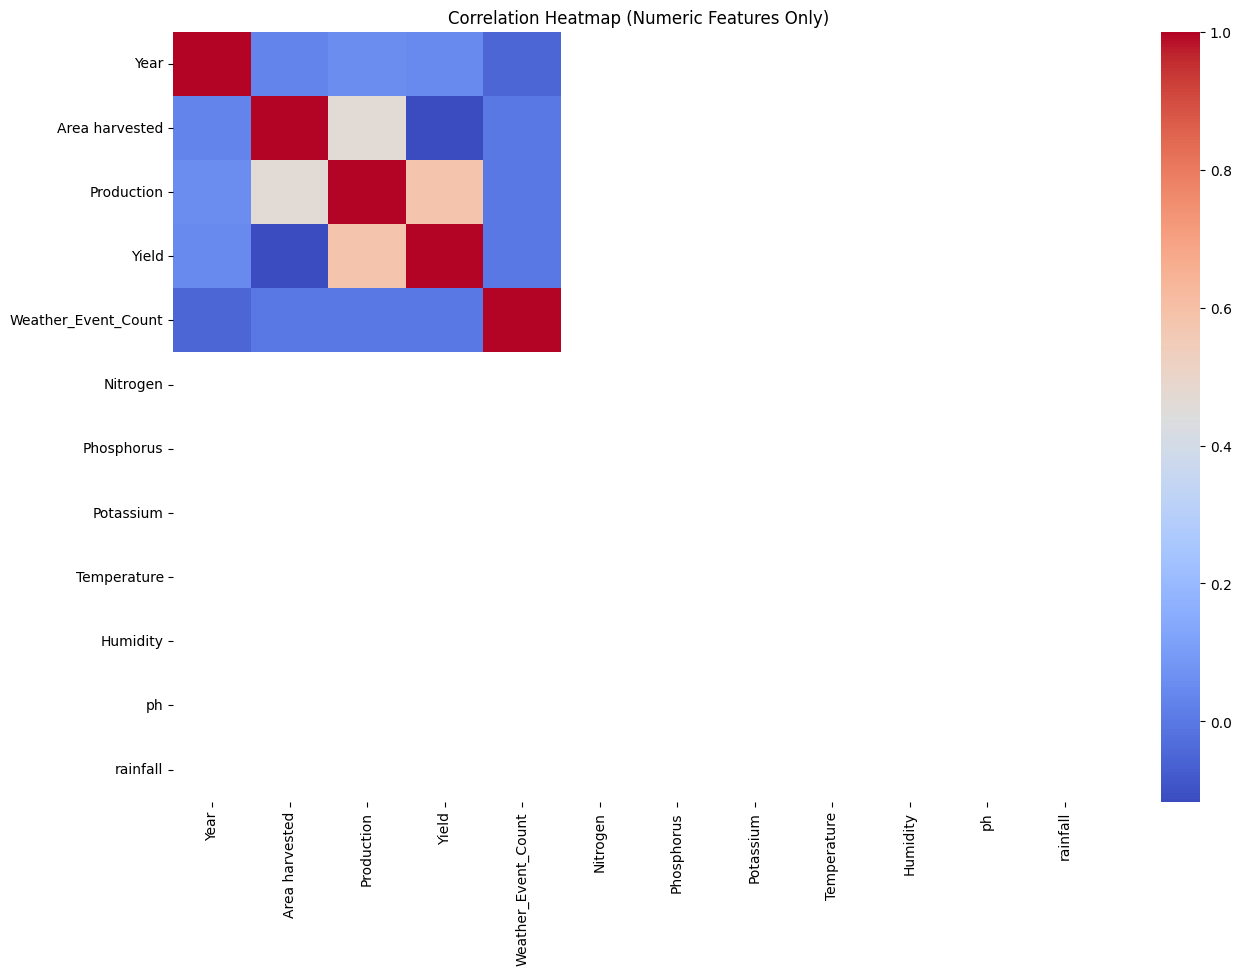

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = final_df.select_dtypes(include=['number'])

plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



Distribution Plots

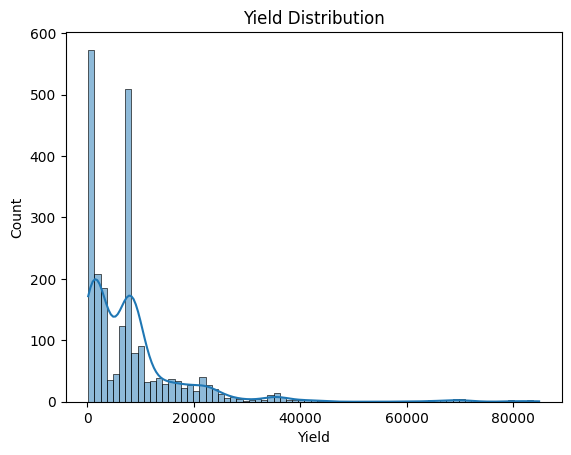

In [21]:
sns.histplot(final_df['Yield'], kde=True)
plt.title("Yield Distribution")
plt.show()


In [25]:
final_df.columns


Index(['Area', 'Item', 'Year', 'Area harvested', 'Production', 'Yield',
       'Weather_Event_Count', 'Nitrogen', 'Phosphorus', 'Potassium',
       'Temperature', 'Humidity', 'ph', 'rainfall', 'label'],
      dtype='object')

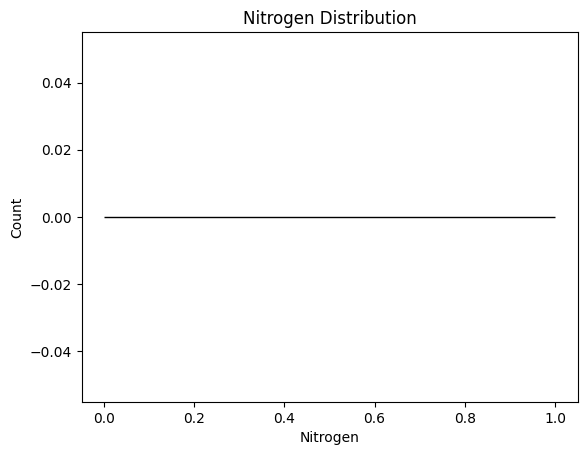

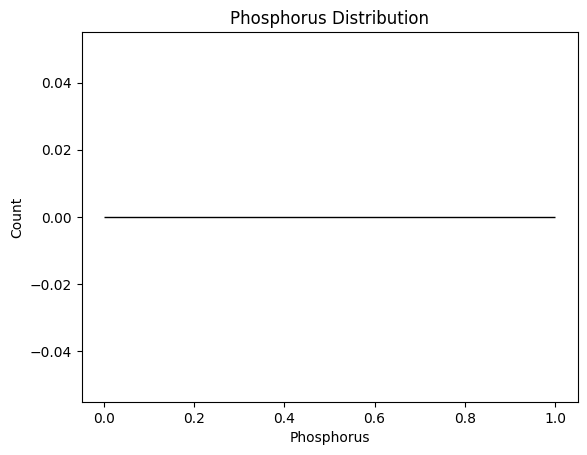

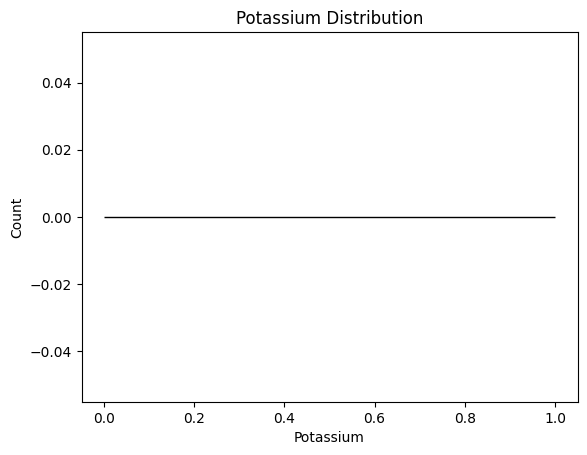

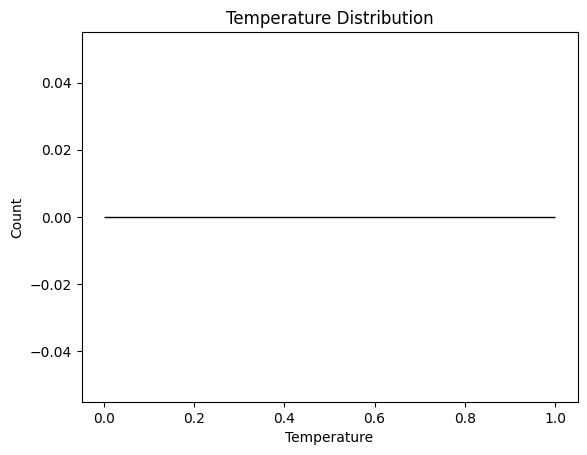

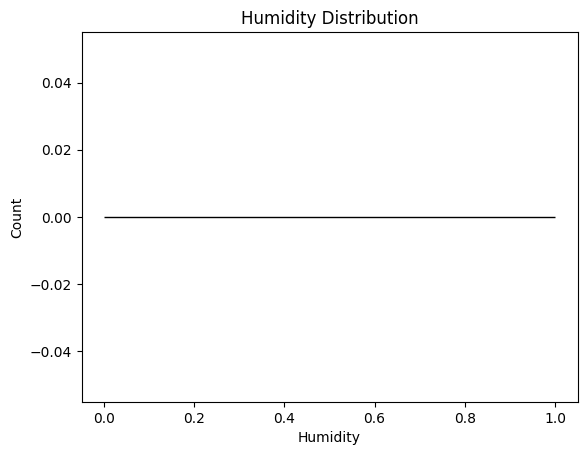

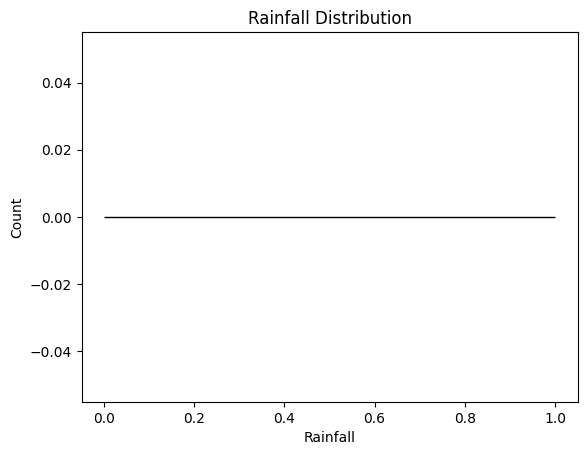

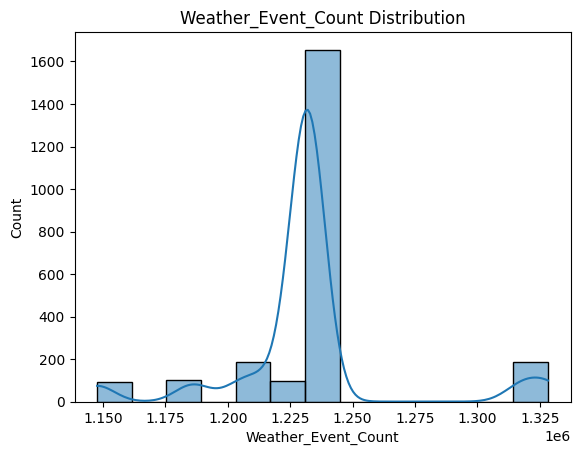

In [27]:
columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','Rainfall','Weather_Event_Count']

for col in columns:
    sns.histplot(final_df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


Relationship Plots

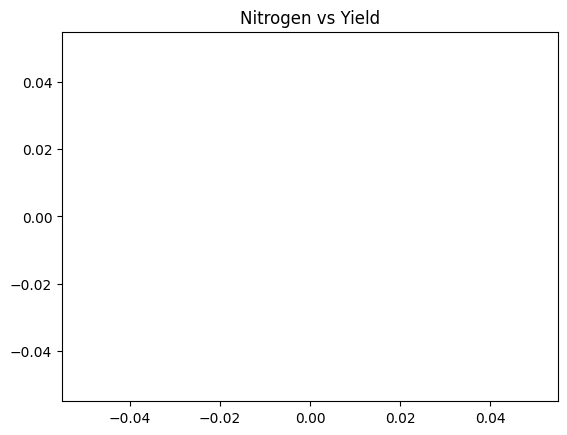

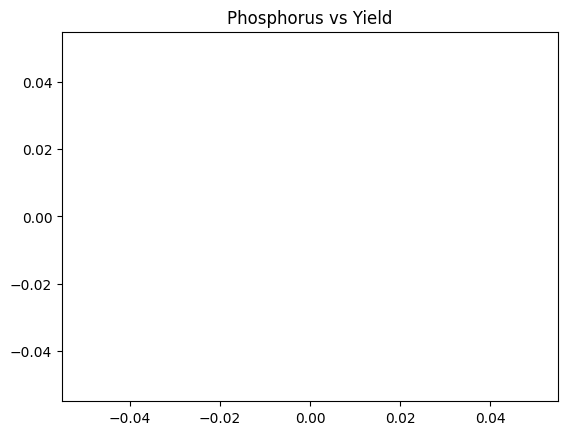

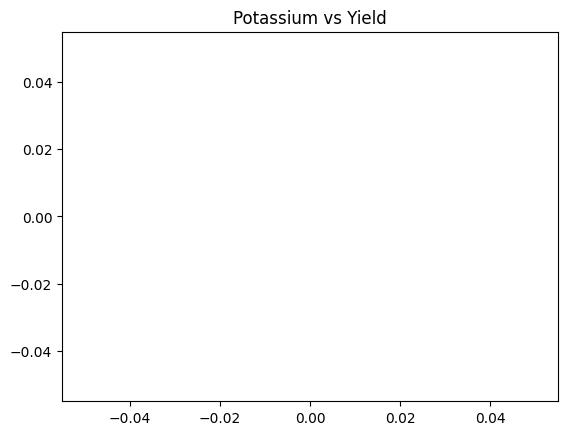

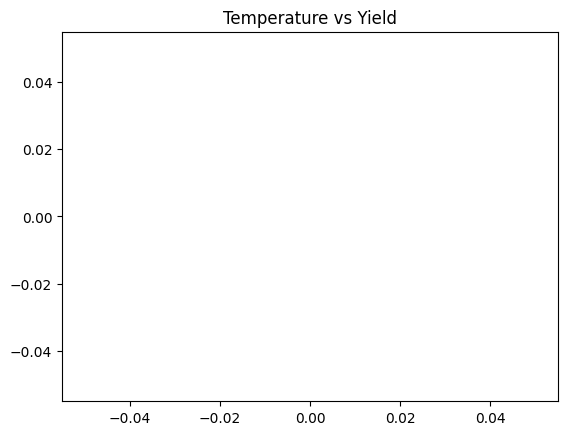

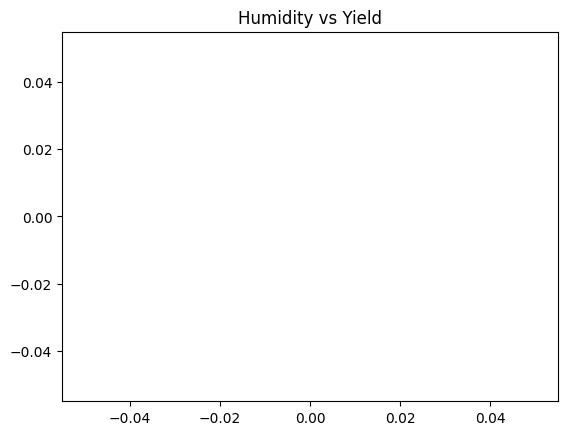

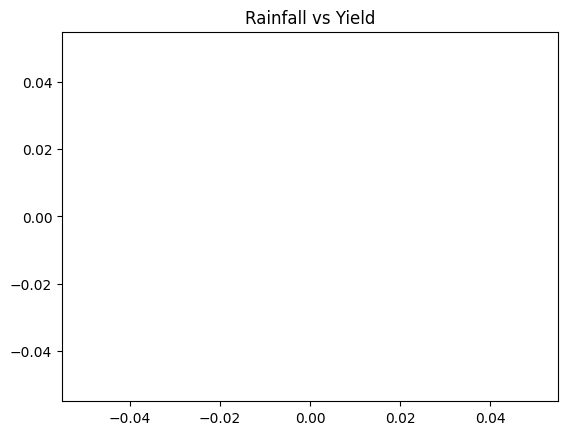

In [33]:
columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','Rainfall']

for col in columns:
    sns.scatterplot(x=final_df[col], y=final_df['Yield'])
    plt.title(f"{col} vs Yield")
    plt.show()


Correlation Matrix

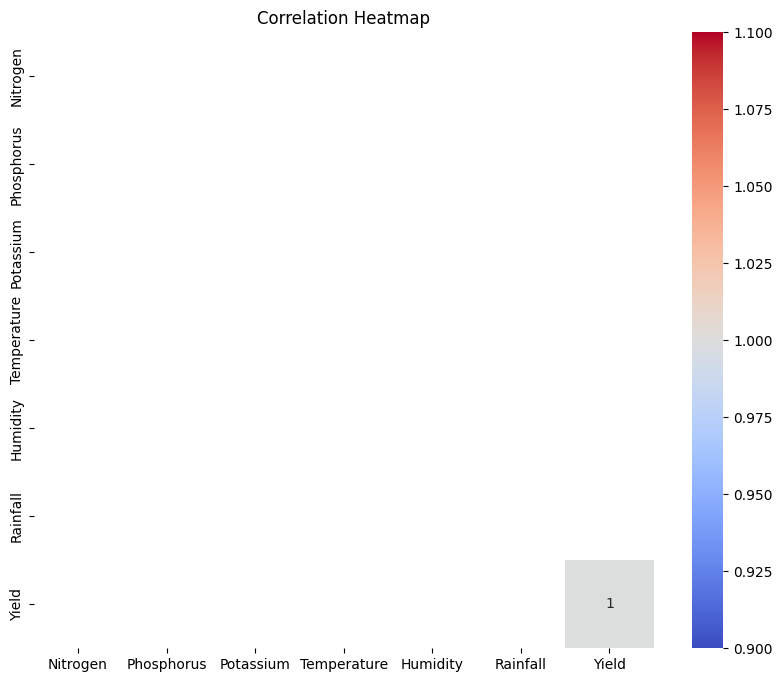

In [34]:
numeric_df = final_df[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','Rainfall','Yield']]

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Yearly Trend of Yield

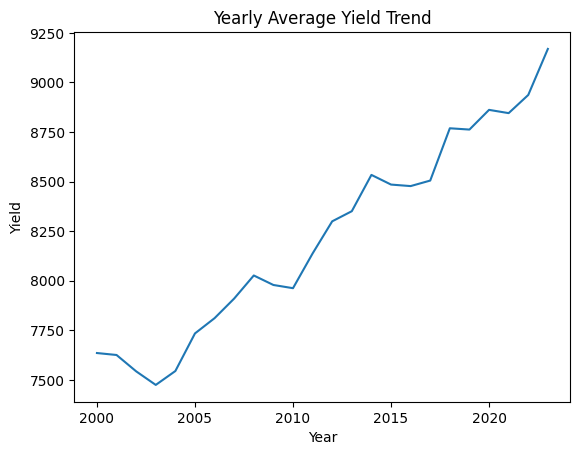

In [35]:
yearly = final_df.groupby('Year')['Yield'].mean().reset_index()

sns.lineplot(data=yearly, x='Year', y='Yield')
plt.title("Yearly Average Yield Trend")
plt.show()
